In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import dlib
import cv2

#Importamos librerias para el gif
import os
import imageio

from morphing import *

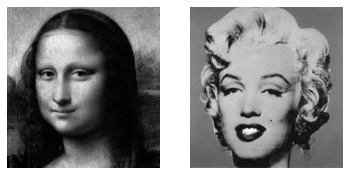

In [ ]:
im1 = cv2.imread("mona.jpg",0)
im2 = cv2.imread("marilyn.jpg",0)

im2 = cv2.resize(im2,(im1.shape[1],im1.shape[0]))

plt.subplot(121)
plt.imshow(im1, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im2, cmap="gray")
plt.axis("off")
plt.show()

# Morphing

Para realizar el morphing es necesario combinar/mezclar progresivamente las dos imágenes

* Controlamos la mezcla mediante un parámetro: $\alpha \in [0, 1]$
* Si $\alpha = 0$ entonces obtenemos la imagen inicial
* Si $\alpha = 1$ entonces obtenemos la imagen final

$$I_t = (1-\alpha)I_1 + \alpha I_2$$

El parámetro $\alpha$ cambiará progresivamente de cero a uno.

### Combinamos solamente las intensidades

(no es suficiente)

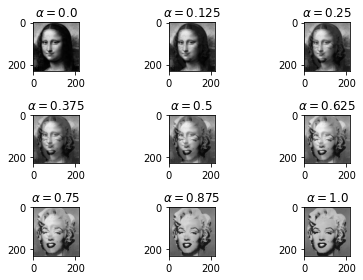

In [ ]:
plt.gray()

for i,a in enumerate([i/float(8) for i in range(9)]):
    plt.subplot(3,3,i+1)
    im_tr = (1-a)*im1+a*im2
    plt.title("$\\alpha = " + str(a) + "$")
    plt.imshow(im_tr)
plt.tight_layout()
plt.show()

### Alineamos las imágenes

Para realizar el morphing además de combinar las intensidades es necesario alinear las imágenes a una **triangulación** que sirva de **referencia**.

La triangulación puede obtenerse transformando también gradualmente las triangulaciones de las dos imágenes.

Para algún valor de $\alpha$ obtenemos las coordenadas de cada punto de la triangulación de referencia mediante las siguientes ecuaciones

\begin{align}
    x_t &= (1-\alpha)x_1 + \alpha x_2\\
    y_t &= (1-\alpha)y_1 + \alpha y_2\\
\end{align}

donde $(x_1, \; y_1)$ son las coordenadas de algún punto de la primera triangulación y $(x_2, \; y_2)$ son las coordenadas del punto correspondiente en la segunda imagen.

In [ ]:
#construimos el detector de puntos de interés

#detector de rostros
detector = dlib.get_frontal_face_detector()

#detector de puntos de interés
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [ ]:
#detecta los puntos de interés en ambas imágenes
rects1 = detector(im1)
shape1 = predictor(im1, rects1[0])
shape1 = shape_to_np(shape1)

rects2 = detector(im2)
shape2 = predictor(im2, rects2[0])
shape2 = shape_to_np(shape2)

In [ ]:
#extiende los puntos de interés de ambas imágenes
shape1 = np.append(shape1,[[im1.shape[1]-1,im1.shape[0]/2],[im1.shape[1]/2,im1.shape[0]-1],[im1.shape[1]/2,0],[0,im1.shape[0]/2],[0,0],[im1.shape[1]-1,0],[0,im1.shape[0]-1],[im1.shape[1]-1,im1.shape[0]-1]], axis=0)
shape2 = np.append(shape2,[[im2.shape[1]-1,im2.shape[0]/2],[im2.shape[1]/2,im2.shape[0]-1],[im2.shape[1]/2,0],[0,im2.shape[0]/2],[0,0],[im2.shape[1]-1,0],[0,im2.shape[0]-1],[im2.shape[1]-1,im2.shape[0]-1]], axis=0)


In [ ]:
#triangulación sobre la primera imagen
tri = Delaunay(shape1)

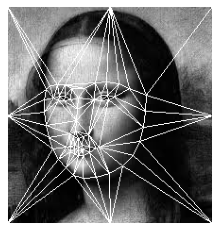

In [ ]:
#muestra la triangulación (sobre la primera imagen)
cp_1 = im1.copy()

for t in tri.simplices:
    pt0 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
    pt1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
    pt2 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

    cv2.line(cp_1,pt0,pt1,(255,255,255),1)
    cv2.line(cp_1,pt0,pt2,(255,255,255),1)
    cv2.line(cp_1,pt1,pt2,(255,255,255),1)

plt.imshow(cp_1,cmap="gray")
plt.axis("off")
plt.show()

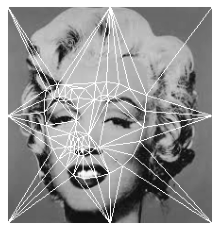

In [ ]:
#muestra la triangulación (sobre la segunda imagen)
cp_2 = im2.copy()

for t in tri.simplices:
    pt0 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
    pt1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
    pt2 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

    cv2.line(cp_2,pt0,pt1,(255,255,255),1)
    cv2.line(cp_2,pt0,pt2,(255,255,255),1)
    cv2.line(cp_2,pt1,pt2,(255,255,255),1)

plt.imshow(cp_2,cmap="gray")
plt.axis("off")
plt.show()

# transforma los puntos (para una $\alpha$)

In [ ]:
#muestra la triangulación (sobre un fondo negro)

def triangulacion(shape, tri, dims, im_in=[]):

    if im_in == []:
        im = np.zeros(dims)
    else:
        im = im_in.copy()

    for t in tri.simplices:
        pt0 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
        pt1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
        pt2 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

        cv2.line(im,pt0,pt1,(255,255,255),1)
        cv2.line(im,pt0,pt2,(255,255,255),1)
        cv2.line(im,pt1,pt2,(255,255,255),1)

    return im

In [ ]:
a = 0.5
shape_a = (1-a)*shape1 + a*shape2
shape_a = shape_a.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


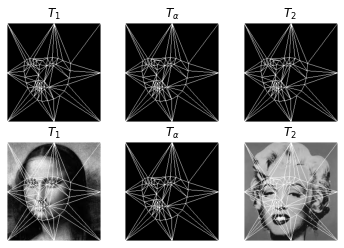

In [ ]:
#muestra la triangulación sobre la imagen original,
#la intermedia y la final

t1 = triangulacion(shape1, tri, im1.shape)
ta = triangulacion(shape_a, tri, im1.shape)
t2 = triangulacion(shape2, tri, im1.shape)

t1_im = triangulacion(shape1, tri, im1.shape, im1)
t2_im = triangulacion(shape2, tri, im1.shape, im2)


plt.gray()
plt.subplot(231)
plt.imshow(t1)
plt.title("$T_1$")
plt.axis("off")

plt.subplot(232)
plt.imshow(ta)
plt.title("$T_{\\alpha}$")
plt.axis("off")

plt.subplot(233)
plt.imshow(t2)
plt.title("$T_2$")
plt.axis("off")

plt.subplot(234)
plt.imshow(t1_im)
plt.title("$T_1$")
plt.axis("off")

plt.subplot(235)
plt.imshow(ta)
plt.title("$T_{\\alpha}$")
plt.axis("off")

plt.subplot(236)
plt.imshow(t2_im)
plt.title("$T_2$")
plt.axis("off")


plt.show()

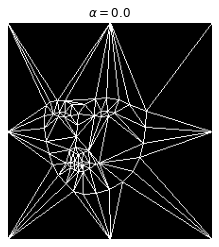

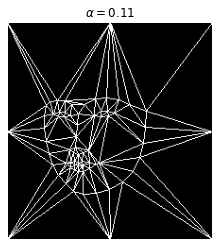

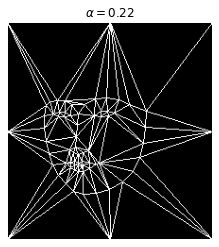

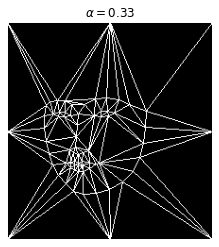

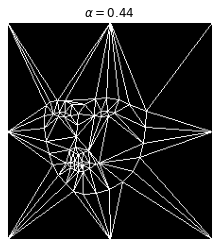

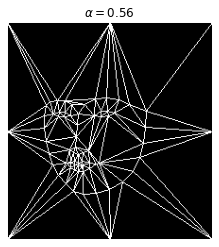

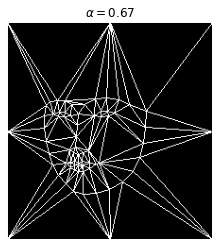

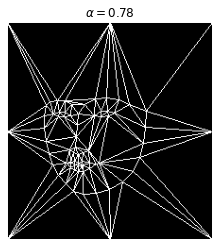

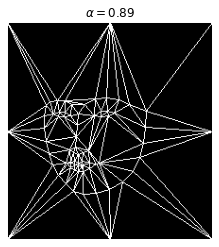

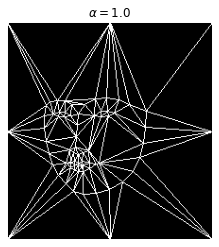

In [ ]:
alfa = np.linspace(0,1,10)

plt.gray()
for i,a in enumerate(alfa):
    shape_a = (1-a)*shape1 + a*shape2
    shape_a = shape_a.astype(int)
    ta = triangulacion(shape_a, tri, im1.shape)
    plt.imshow(ta)
    plt.title("$\\alpha=$"+str(round(a,2)))
    plt.axis("off")
    plt.show()

In [ ]:
#Selecciopnamos un triangulo
n = 10
t = tri.simplices[n]

In [ ]:
#Se dibuja el primer triangulo de la img1
cp_1 = im1.copy()

pt0 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
pt1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
pt2 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

pts1 = [pt0, pt1, pt2]

cv2.line(cp_1,pt0,pt1,(255,255,255),1)
cv2.line(cp_1,pt0,pt2,(255,255,255),1)
cv2.line(cp_1,pt1,pt2,(255,255,255),1)

array([[152, 165, 147, ..., 133, 133, 133],
       [143, 160, 142, ..., 100, 127, 127],
       [169, 167, 137, ..., 100, 141, 141],
       ...,
       [  5,   8,   3, ..., 255,  29, 255],
       [  7,   2,  10, ...,  13, 255, 255],
       [ 10,   0,  12, ...,   6,  12, 255]], dtype=uint8)

In [ ]:
#Se dibuja el primer triangulo de la img2
cp_2 = im2.copy()

pt0 = (round(shape2[t[0]][0]),round(shape2[t[0]][1]))
pt1 = (round(shape2[t[1]][0]),round(shape2[t[1]][1]))
pt2 = (round(shape2[t[2]][0]),round(shape2[t[2]][1]))

pts2 = [pt0, pt1, pt2]

cv2.line(cp_2,pt0,pt1,(255,255,255),1)
cv2.line(cp_2,pt0,pt2,(255,255,255),1)
cv2.line(cp_2,pt1,pt2,(255,255,255),1)


array([[114, 114, 114, ..., 116, 119, 121],
       [115, 114, 114, ..., 116, 119, 121],
       [115, 115, 114, ..., 116, 119, 121],
       ...,
       [102, 102, 102, ..., 255, 109, 255],
       [103, 103, 103, ..., 108, 255, 255],
       [124, 124, 124, ..., 117, 117, 255]], dtype=uint8)

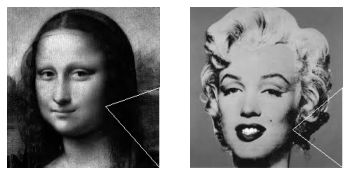

In [ ]:
#Se imprimen las 2 imagenes y se sacan los triangulos
plt.subplot(121)
plt.imshow(cp_1,cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(cp_2,cmap="gray")
plt.axis("off")

plt.show()

In [ ]:
pts1 = np.float32(np.array(pts1))
pts2 = np.float32(np.array(pts2))

In [ ]:
taf = cv2.getAffineTransform(pts2,pts1)
imt = cv2.warpAffine(im2,taf,(im2.shape[1],im2.shape[0]))

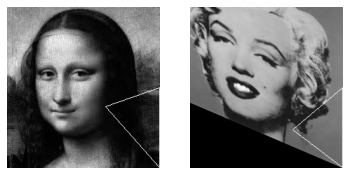

In [ ]:
cp_2 = imt.copy()

pt0 = (round(shape2[t[0]][0]),round(shape2[t[0]][1]))
pt1 = (round(shape2[t[1]][0]),round(shape2[t[1]][1]))
pt2 = (round(shape2[t[2]][0]),round(shape2[t[2]][1]))

pts2 = [pt0, pt1, pt2]

cv2.line(cp_2,pt0,pt1,(255,255,255),1)
cv2.line(cp_2,pt0,pt2,(255,255,255),1)
cv2.line(cp_2,pt1,pt2,(255,255,255),1)

plt.subplot(121)
plt.imshow(cp_1,cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(cp_2,cmap="gray")
plt.axis("off")

plt.show()

In [ ]:
def triangulo_transf(t, shape1, shape2, im):

    #extrae los puntos correspondientes en ambos triángulos
    pt0_1 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
    pt1_1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
    pt2_1 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))
    pts1_1 = [pt0_1, pt1_1, pt2_1]

    pt0_2 = (round(shape2[t[0]][0]),round(shape2[t[0]][1]))
    pt1_2 = (round(shape2[t[1]][0]),round(shape2[t[1]][1]))
    pt2_2 = (round(shape2[t[2]][0]),round(shape2[t[2]][1]))
    pts2_2 = [pt0_2, pt1_2, pt2_2]

    #determina la transformación afín (utiliza cv2.getAffineTransform)
    pts1_1 = np.float32(np.array(pts1_1))
    pts2_2 = np.float32(np.array(pts2_2))

    taf = cv2.getAffineTransform(pts2_2 ,pts1_1)

    #determina la homografía
    #h, c = cv2.findHomography(pts1_1, pts2_2)

    #transforma los puntos y la imagen (aplica la homografía)
    imt = cv2.warpAffine(im, taf, (im2.shape[1], im.shape[0]))

    #inicia una matriz con ceros únicamente
    #alpha = np.zeros((m,n))
    alpha = np.zeros((im.shape))

    #recorre la imagen transformada,
    #identifica los puntos que se enuentran
    #dentro del triángulo y cópialos
    x1, y1 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
    x2, y2 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
    x3, y3 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

    # Los puntos del triangulo
    pts = ([x1, y1], [x2, y2], [x3, y3])

    # Meter los 3 puntos en un arreglo
    xs = [x1, x2, x3]
    ys = [y1, y2, y3]

    # Ordenar los arreglos para saber la x sup y x inf y lo mismo con las y
    xs = np.sort(xs)
    ys = np.sort(ys)

    # Esquinas superiores del cuadrado
    esq1 = (xs[0], ys[2])
    esq2 = (xs[2], ys[2])
    # Esquinas inferiores del cuadrado
    esq3 = (xs[2], ys[0])
    esq4 = (xs[0], ys[0])

    # Recorrer el cuadrado
    for i in range (xs[0], xs[2]):
        for j in range (ys[0], ys[2]):

            # Area del triangulo principal
            t = np.matrix([ [pts[0][0], pts[0][1], 1], [pts[1][0], pts[1][1], 1], [pts[2][0], pts[2][1], 1] ])
            td = np.linalg.det(t)
            a = td / 2
            # No hay areas negativas
            if a < 0:
                a = a * -1

            # Areas de los triangulos formados con el punto
            t1 = np.matrix([ [pts[0][0], pts[0][1], 1], [pts[1][0], pts[1][1], 1], [i, j, 1] ])
            td1 = np.linalg.det(t1)
            a1 = td1 / 2

            if a1 < 0:
                a1 = a1 * -1

            t2 = np.matrix([ [pts[1][0], pts[1][1], 1], [pts[2][0], pts[2][1], 1], [i, j, 1] ])
            td2 = np.linalg.det(t2)
            a2 = td2 / 2

            if a2 < 0:
                a2 = a2 * -1

            t3 = np.matrix([ [pts[2][0], pts[2][1], 1], [pts[0][0], pts[0][1], 1], [i, j, 1] ])
            td3 = np.linalg.det(t3)
            a3 = td3 / 2

            if a3 < 0:
                a3 = a3 * -1

            areas = a1 + a2 + a3

            res = a - areas

            res = round(res)

            if res == 0:
                #print i, j
                alpha[j,i]= imt[j,i]

    return alpha

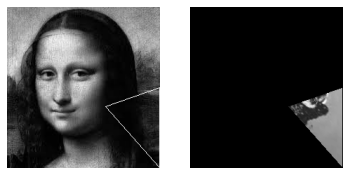

In [ ]:
#selecciono un triángulo
n = 10
t = tri.simplices[n]

#transforma la imagen alineando el triángulo y lo extrae
triang_tr = triangulo_transf(t, shape1, shape2, im2)

#muestra la imagen
plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(cp_1)

plt.subplot(122)
plt.imshow(triang_tr,cmap="gray")
plt.axis("off")
plt.show()

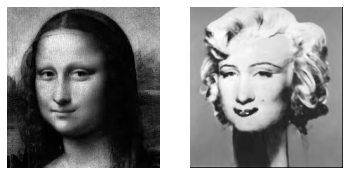

In [ ]:
im_fin = np.zeros((im1.shape))

for t in tri.simplices:
#transforma la imagen alineando el triángulo y lo extrae
    triang_tr = triangulo_transf(t, shape1, shape2, im2)
    im_fin = im_fin + triang_tr

im_fin = im_fin.astype(np.uint8)
im_fin = cv2.medianBlur(im_fin,3)

#muestra la imagen
plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(im1)

plt.subplot(122)
plt.imshow(im_fin,cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
#Creamos una funcion donde trabajaremos funcion final

def trans_fin(tri,shape2,shape1,im2,im1):
    im_fin = np.zeros((im1.shape))

    for t in tri.simplices:
        #transforma la imagen alineando el triángulo y lo extrae
        triang_tr = triangulo_transf(t, shape1, shape2, im2)
        im_fin = im_fin + triang_tr

    im_fin = im_fin.astype(np.uint8)  #aplicamos filtro para que quede bien la imagen
    im_fin = cv2.medianBlur(im_fin,3)

    return im_fin

In [ ]:
#funcion para combinar las triangulaciones combinadas

def obtener_triangulacion(shape1,shape2,a):
    combinada= np.zeros((len(shape1), 2))

    #combinamos las triangualaciones
    for i in range (0,len(combinada)):
            xt=(1-a)*shape1[i][0]+a*shape2[i][0]
            yt=(1-a)*shape1[i][1]+a*shape2[i][1]

            combinada[i][0]=xt
            combinada[i][1]=yt

    combinada=combinada.astype(int)

    return combinada

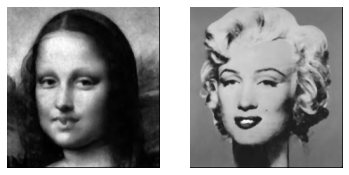

In [ ]:
a=0.5

shapet=obtener_triangulacion(shape1,shape2,a)

#Se combinan las triangulaciones
im_fin1=trans_fin(tri, shape1, shapet, im1, im1)
im_fin2=trans_fin(tri, shape2, shapet, im2, im2)

plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(im_fin1)

plt.subplot(122)
plt.imshow(im_fin2,cmap="gray")
plt.axis("off")
plt.show()

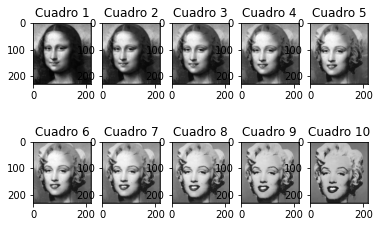

In [ ]:
a=0.1
gif = []
for i in range(10):
        plt.subplot(2,5,i+1)

        #obtenemos la triangulacion combinada
        shapet=obtener_triangulacion(shape1,shape2,a)

        #Alineamos la imagen uno y dos con esa triangulacion
        im_fin1=trans_fin(tri,shape1,shapet,im1,im1)
        im_fin2=trans_fin(tri,shape2,shapet,im2,im2)

        #combinamos las intensidades de las dos imagenes
        im_fin =(1-a)*im_fin1+a*im_fin2
        gif.append(im_fin)
        plt.title("Cuadro " + str(i+1))
        plt.imshow(im_fin)
        a=a+0.1

plt.show()

# Proyecto

* Completa las tareas para realizar el morphing de las dos imágenes en este notebook.
* Captura una imagen de tu rostro y una de algún compañero y realiza el morphing de ambas.
* Construye una imagen gif animada para mostrar el morphing de ambas imágenes.

### Alineamos las imágenes

Agregamos la imagen 1(unknown.png) y imagen 2(unknown2.png) y hacemos que las 2 imagenes queden del mismo tamaño

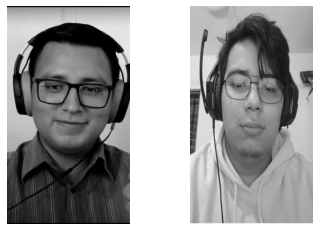

In [ ]:
im1 = cv2.imread("unknown.png",0)
im2 = cv2.imread("unknown2.png",0)

im2 = cv2.resize(im2,(im1.shape[1],im1.shape[0]))

plt.subplot(121)
plt.imshow(im1, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im2, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
#construimos el detector de puntos de interés

#detector de rostros
detector = dlib.get_frontal_face_detector()

#detector de puntos de interés
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [ ]:
#detecta los puntos de interés en ambas imágenes
rects1 = detector(im1)
shape1 = predictor(im1, rects1[0])
shape1 = shape_to_np(shape1)

rects2 = detector(im2)
shape2 = predictor(im2, rects2[0])
shape2 = shape_to_np(shape2)

In [ ]:
#extiende los puntos de interés de ambas imágenes
shape1 = np.append(shape1,[[im1.shape[1]-1,im1.shape[0]/2],[im1.shape[1]/2,im1.shape[0]-1],[im1.shape[1]/2,0],[0,im1.shape[0]/2],[0,0],[im1.shape[1]-1,0],[0,im1.shape[0]-1],[im1.shape[1]-1,im1.shape[0]-1]], axis=0)
shape2 = np.append(shape2,[[im2.shape[1]-1,im2.shape[0]/2],[im2.shape[1]/2,im2.shape[0]-1],[im2.shape[1]/2,0],[0,im2.shape[0]/2],[0,0],[im2.shape[1]-1,0],[0,im2.shape[0]-1],[im2.shape[1]-1,im2.shape[0]-1]], axis=0)


puntos de la *imagen* 1

In [ ]:
len(shape1)

76

In [ ]:
puntos de la *imagen* 2

In [ ]:
len(shape2)

76

In [ ]:
#triangulación sobre la primera imagen
tri = Delaunay(shape1)
tri2 = Delaunay(shape2)

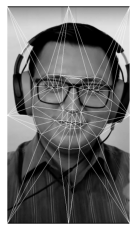

In [ ]:
#muestra la triangulación (sobre la primera imagen)
cp_1 = im1.copy()

for t in tri.simplices:
    pt0 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
    pt1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
    pt2 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

    cv2.line(cp_1,pt0,pt1,(255,255,255),1)
    cv2.line(cp_1,pt0,pt2,(255,255,255),1)
    cv2.line(cp_1,pt1,pt2,(255,255,255),1)

plt.imshow(cp_1,cmap="gray")
plt.axis("off")
plt.show()

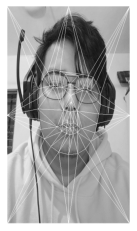

In [ ]:
#muestra la triangulación (sobre la segunda imagen)
cp_2 = im2.copy()

for t in tri.simplices:
    pt0 = (round(shape2[t[0]][0]),round(shape2[t[0]][1]))
    pt1 = (round(shape2[t[1]][0]),round(shape2[t[1]][1]))
    pt2 = (round(shape2[t[2]][0]),round(shape2[t[2]][1]))

    cv2.line(cp_2,pt0,pt1,(255,255,255),1)
    cv2.line(cp_2,pt0,pt2,(255,255,255),1)
    cv2.line(cp_2,pt1,pt2,(255,255,255),1)

plt.imshow(cp_2,cmap="gray")
plt.axis("off")
plt.show()

# transforma los puntos (para una $\alpha$)


In [ ]:
#muestra la triangulación (sobre un fondo negro)

def triangulacion(shape, tri, dims, im_in=[]):

    if im_in == []:
        im = np.zeros(dims)
    else:
        im = im_in.copy()

    for t in tri.simplices:
        pt0 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
        pt1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
        pt2 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

        cv2.line(im,pt0,pt1,(255,255,255),1)
        cv2.line(im,pt0,pt2,(255,255,255),1)
        cv2.line(im,pt1,pt2,(255,255,255),1)

    return im

In [ ]:
a = 0.5
shape_a = (1-a)*shape1 + a*shape2
shape_a = shape_a.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


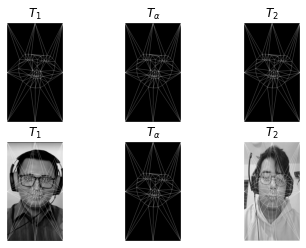

In [ ]:
#muestra la triangulación sobre la imagen original,
#la intermedia y la final

t1 = triangulacion(shape1, tri, im1.shape)
ta = triangulacion(shape_a, tri, im1.shape)
t2 = triangulacion(shape2, tri, im1.shape)

t1_im = triangulacion(shape1, tri, im1.shape, im1)
t2_im = triangulacion(shape2, tri, im1.shape, im2)


plt.gray()
plt.subplot(231)
plt.imshow(t1)
plt.title("$T_1$")
plt.axis("off")

plt.subplot(232)
plt.imshow(ta)
plt.title("$T_{\\alpha}$")
plt.axis("off")

plt.subplot(233)
plt.imshow(t2)
plt.title("$T_2$")
plt.axis("off")

plt.subplot(234)
plt.imshow(t1_im)
plt.title("$T_1$")
plt.axis("off")

plt.subplot(235)
plt.imshow(ta)
plt.title("$T_{\\alpha}$")
plt.axis("off")

plt.subplot(236)
plt.imshow(t2_im)
plt.title("$T_2$")
plt.axis("off")


plt.show()

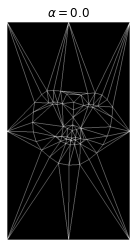

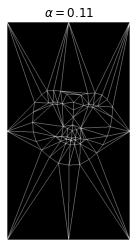

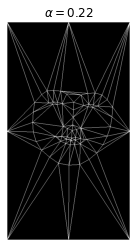

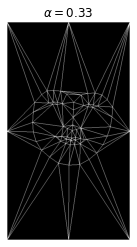

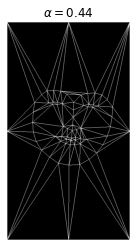

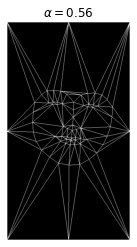

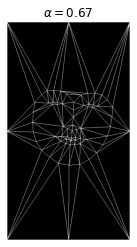

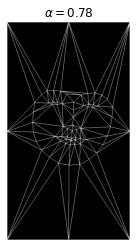

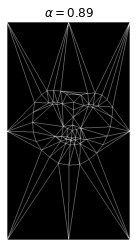

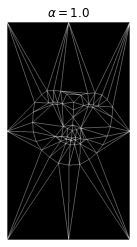

In [ ]:
alfa = np.linspace(0,1,10)

plt.gray()
for i,a in enumerate(alfa):
    shape_a = (1-a)*shape1 + a*shape2
    shape_a = shape_a.astype(int)
    ta = triangulacion(shape_a, tri, im1.shape)
    plt.imshow(ta)
    plt.title("$\\alpha=$"+str(round(a,2)))
    plt.axis("off")
    plt.show()

In [ ]:
#Selecciopnamos un triangulo
n = 10
t = tri.simplices[n]

In [ ]:
#Se dibuja el primer triangulo de la img1
cp_1 = im1.copy()

pt0 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
pt1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
pt2 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

pts1 = [pt0, pt1, pt2]

cv2.line(cp_1,pt0,pt1,(255,255,255),1)
cv2.line(cp_1,pt0,pt2,(255,255,255),1)
cv2.line(cp_1,pt1,pt2,(255,255,255),1)

array([[  1,   0,   0, ...,   1,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   1, ...,   0, 255,   1],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
#Se dibuja el primer triangulo de la img2
cp_2 = im2.copy()

pt0 = (round(shape2[t[0]][0]),round(shape2[t[0]][1]))
pt1 = (round(shape2[t[1]][0]),round(shape2[t[1]][1]))
pt2 = (round(shape2[t[2]][0]),round(shape2[t[2]][1]))

pts2 = [pt0, pt1, pt2]

cv2.line(cp_2,pt0,pt1,(255,255,255),1)
cv2.line(cp_2,pt0,pt2,(255,255,255),1)
cv2.line(cp_2,pt1,pt2,(255,255,255),1)


array([[192, 191, 192, ..., 169, 165, 255],
       [191, 191, 191, ..., 169, 255, 255],
       [194, 193, 193, ..., 167, 255, 164],
       ...,
       [211, 205, 202, ..., 189, 187, 186],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

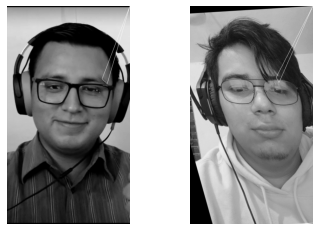

In [ ]:
#Se imprimen las 2 imagenes y se sacan los triangulos
plt.subplot(121)
plt.imshow(cp_1,cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(cp_2,cmap="gray")
plt.axis("off")

plt.show()

In [ ]:
pts1 = np.float32(np.array(pts1))
pts2 = np.float32(np.array(pts2))

In [ ]:
taf = cv2.getAffineTransform(pts2,pts1)
imt = cv2.warpAffine(im2,taf,(im2.shape[1],im2.shape[0]))

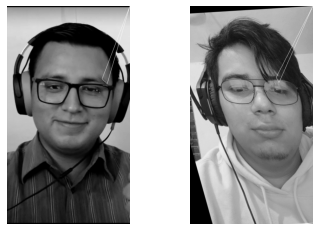

In [ ]:
cp_2 = imt.copy()

pt0 = (round(shape2[t[0]][0]),round(shape2[t[0]][1]))
pt1 = (round(shape2[t[1]][0]),round(shape2[t[1]][1]))
pt2 = (round(shape2[t[2]][0]),round(shape2[t[2]][1]))

pts2 = [pt0, pt1, pt2]

cv2.line(cp_2,pt0,pt1,(255,255,255),1)
cv2.line(cp_2,pt0,pt2,(255,255,255),1)
cv2.line(cp_2,pt1,pt2,(255,255,255),1)

plt.subplot(121)
plt.imshow(cp_1,cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(cp_2,cmap="gray")
plt.axis("off")

plt.show()

In [ ]:
def triangulo_transf(t, shape1, shape2, im):

    #extrae los puntos correspondientes en ambos triángulos
    pt0_1 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
    pt1_1 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
    pt2_1 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))
    pts1_1 = [pt0_1, pt1_1, pt2_1]

    pt0_2 = (round(shape2[t[0]][0]),round(shape2[t[0]][1]))
    pt1_2 = (round(shape2[t[1]][0]),round(shape2[t[1]][1]))
    pt2_2 = (round(shape2[t[2]][0]),round(shape2[t[2]][1]))
    pts2_2 = [pt0_2, pt1_2, pt2_2]

    #determina la transformación afín (utiliza cv2.getAffineTransform)
    pts1_1 = np.float32(np.array(pts1_1))
    pts2_2 = np.float32(np.array(pts2_2))

    taf = cv2.getAffineTransform(pts2_2 ,pts1_1)

    #determina la homografía
    #h, c = cv2.findHomography(pts1_1, pts2_2)

    #transforma los puntos y la imagen (aplica la homografía)
    imt = cv2.warpAffine(im, taf, (im2.shape[1], im.shape[0]))

    #inicia una matriz con ceros únicamente
    #alpha = np.zeros((m,n))
    alpha = np.zeros((im.shape))

    #recorre la imagen transformada,
    #identifica los puntos que se enuentran
    #dentro del triángulo y cópialos
    x1, y1 = (round(shape1[t[0]][0]),round(shape1[t[0]][1]))
    x2, y2 = (round(shape1[t[1]][0]),round(shape1[t[1]][1]))
    x3, y3 = (round(shape1[t[2]][0]),round(shape1[t[2]][1]))

    # Los puntos del triangulo
    pts = ([x1, y1], [x2, y2], [x3, y3])

    # Meter los 3 puntos en un arreglo
    xs = [x1, x2, x3]
    ys = [y1, y2, y3]

    # Ordenar los arreglos para saber la x sup y x inf y lo mismo con las y
    xs = np.sort(xs)
    ys = np.sort(ys)

    # Esquinas superiores del cuadrado
    esq1 = (xs[0], ys[2])
    esq2 = (xs[2], ys[2])
    # Esquinas inferiores del cuadrado
    esq3 = (xs[2], ys[0])
    esq4 = (xs[0], ys[0])

    # Recorrer el cuadrado
    for i in range (xs[0], xs[2]):
        for j in range (ys[0], ys[2]):

            # Area del triangulo principal
            t = np.matrix([ [pts[0][0], pts[0][1], 1], [pts[1][0], pts[1][1], 1], [pts[2][0], pts[2][1], 1] ])
            td = np.linalg.det(t)
            a = td / 2
            # No hay areas negativas
            if a < 0:
                a = a * -1

            # Areas de los triangulos formados con el punto
            t1 = np.matrix([ [pts[0][0], pts[0][1], 1], [pts[1][0], pts[1][1], 1], [i, j, 1] ])
            td1 = np.linalg.det(t1)
            a1 = td1 / 2

            if a1 < 0:
                a1 = a1 * -1

            t2 = np.matrix([ [pts[1][0], pts[1][1], 1], [pts[2][0], pts[2][1], 1], [i, j, 1] ])
            td2 = np.linalg.det(t2)
            a2 = td2 / 2

            if a2 < 0:
                a2 = a2 * -1

            t3 = np.matrix([ [pts[2][0], pts[2][1], 1], [pts[0][0], pts[0][1], 1], [i, j, 1] ])
            td3 = np.linalg.det(t3)
            a3 = td3 / 2

            if a3 < 0:
                a3 = a3 * -1

            areas = a1 + a2 + a3

            res = a - areas

            res = round(res)

            if res == 0:
                #print i, j
                alpha[j,i]= imt[j,i]

    return alpha

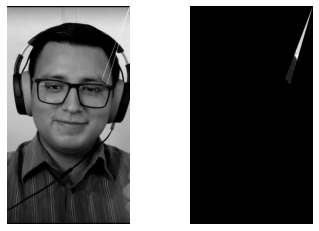

In [ ]:
#selecciono un triángulo
n = 10
t = tri.simplices[n]

#transforma la imagen alineando el triángulo y lo extrae
triang_tr = triangulo_transf(t, shape1, shape2, im2)

#muestra la imagen
plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(cp_1)

plt.subplot(122)
plt.imshow(triang_tr,cmap="gray")
plt.axis("off")
plt.show()

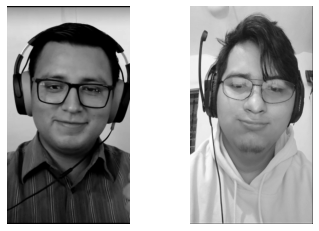

In [ ]:
im_fin = np.zeros((im1.shape))

for t in tri.simplices:
#Se transforma la imagen alineando el triángulo y lo extrae
    triang_tr = triangulo_transf(t, shape1, shape2, im2)
    im_fin = im_fin + triang_tr

im_fin = im_fin.astype(np.uint8)
im_fin = cv2.medianBlur(im_fin,3)

#Se muestra la imagen
plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(im1)

plt.subplot(122)
plt.imshow(im_fin,cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
#Creamos una funcion donde trabajaremos funcion final

def trans_fin(tri,shape2,shape1,im2,im1):
    im_fin = np.zeros((im1.shape))

    for t in tri.simplices:
        #Se transforma la imagen alineando el triángulo y lo extrae
        triang_tr = triangulo_transf(t, shape1, shape2, im2)
        im_fin = im_fin + triang_tr

    im_fin = im_fin.astype(np.uint8)  #Ajustamos lsa imagenes
    im_fin = cv2.medianBlur(im_fin,3)

    return im_fin

In [ ]:
#Creamos una funcion para obtener la triangulacion de las 2
def obtener_triangulacion(shape1,shape2,a):
    combinada= np.zeros((len(shape1), 2))

    #Hacemos una combinacion de triangulaciones
    for i in range (0,len(combinada)):
            xt=(1-a)*shape1[i][0]+a*shape2[i][0]
            yt=(1-a)*shape1[i][1]+a*shape2[i][1]

            combinada[i][0]=xt
            combinada[i][1]=yt

    combinada=combinada.astype(int)

    return combinada

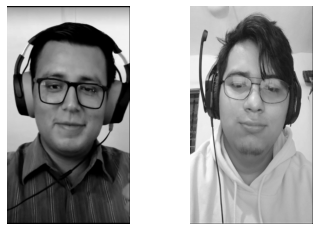

In [ ]:
a=0.5

shapet=obtener_triangulacion(shape1,shape2,a)

#Se combinan las triangulaciones
im_fin1=trans_fin(tri, shape1, shapet, im1, im1)
im_fin2=trans_fin(tri, shape2, shapet, im2, im2)

plt.gray()
plt.subplot(121)
plt.axis("off")
plt.imshow(im_fin1)

plt.subplot(122)
plt.imshow(im_fin2,cmap="gray")
plt.axis("off")
plt.show()

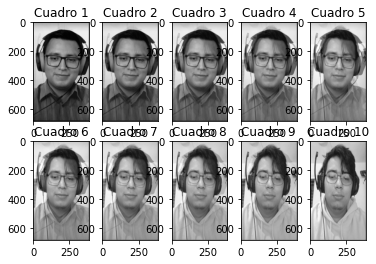

In [ ]:
a=0.1
gif=[]
for i in range(10):
        plt.subplot(2,5,i+1)

        #obtenemos la triangulacion combinada
        shapet=obtener_triangulacion(shape1,shape2,a)

        #Alineamos la imagen uno y dos con esa triangulacion
        im_fin1=trans_fin(tri,shape1,shapet,im1,im1)
        im_fin2=trans_fin(tri,shape2,shapet,im2,im2)

        #combinamos las intensidades de las dos imagenes
        im_fin =(1-a)*im_fin1+a*im_fin2
        gif.append(im_fin)
        plt.title("Cuadro " + str(i+1))
        plt.imshow(im_fin)
        a=a+0.1

plt.show()

imageio.mimsave('morphing.gif', gif)